# Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the Dataset

In [ ]:
data = pd.read_csv("supermarket_sales.csv")
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment,Date,Time,Total,Quantity,Tax 5%,Unit price,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet,01-05-2019,13:08,548.9715,7,26.1415,74.69,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,03-08-2019,10:29,80.2200,5,3.8200,15.28,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card,03-03-2019,13:23,340.5255,7,16.2155,46.33,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet,1/27/2019,20:33,489.0480,8,23.2880,58.22,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet,02-08-2019,10:37,634.3785,7,30.2085,86.31,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,59715573,A,Naypyitaw,Member,Female,Health and beauty,Ewallet,03-08-2023,09:06:24,748.9000,6,28.3900,23.14,421.56,4.761905,14.8800,4.2
1996,584999925,B,Yangon,Normal,Female,Electronic accessories,Cash,23-10-2023,19:21:21,743.7400,9,7.7600,28.72,250.08,4.761905,16.9800,7.0
1997,200873076,B,Naypyitaw,Normal,Female,Electronic accessories,Ewallet,06-02-2024,14:27:32,609.5500,1,30.1400,22.10,476.85,4.761905,1.4500,9.0
1998,301235925,C,Naypyitaw,Member,Female,Food and beverages,Cash,16-02-2024,09:08:56,988.8500,2,27.1400,22.03,420.38,4.761905,34.3700,1.5


# Initial Data Analysis

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment,Date,Time,Total,Quantity,Tax 5%,Unit price,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet,01-05-2019,13:08,548.9715,7,26.1415,74.69,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,03-08-2019,10:29,80.2200,5,3.8200,15.28,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card,03-03-2019,13:23,340.5255,7,16.2155,46.33,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet,1/27/2019,20:33,489.0480,8,23.2880,58.22,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet,02-08-2019,10:37,634.3785,7,30.2085,86.31,604.17,4.761905,30.2085,5.3


In [ ]:
data.describe()

,Total,Quantity,Tax 5%,Unit price,cogs,gross margin percentage,gross income,Rating
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,417.286830,5.513500,20.214879,55.748480,306.580840,4.761905,19.958254,6.183800
std,284.305722,2.902246,13.739242,26.225031,184.187619,0.000000,13.781942,2.333525
min,10.040000,1.000000,0.508500,10.010000,10.170000,4.761905,0.508500,1.000000
25%,165.978750,3.000000,8.210625,33.647500,162.735000,4.761905,7.991250,4.500000
50%,369.762000,6.000000,17.599500,55.730000,283.770000,4.761905,17.060000,6.400000
75%,641.532500,8.000000,31.067500,78.132500,418.967500,4.761905,30.478500,8.100000
max,1042.650000,10.000000,49.920000,99.980000,993.000000,4.761905,49.970000,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               2000 non-null   object 
 1   Branch                   2000 non-null   object 
 2   City                     2000 non-null   object 
 3   Customer type            2000 non-null   object 
 4   Gender                   2000 non-null   object 
 5   Product line             2000 non-null   object 
 6   Payment                  2000 non-null   object 
 7   Date                     2000 non-null   object 
 8   Time                     2000 non-null   object 
 9   Total                    2000 non-null   float64
 10  Quantity                 2000 non-null   int64  
 11  Tax 5%                   2000 non-null   float64
 12  Unit price               2000 non-null   float64
 13  cogs                     2000 non-null   float64
 14  gross margin percentage 

In [ ]:
data.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line            Payment      Date        Time      Total     Quantity  Tax 5%   Unit price  cogs    gross margin percentage  gross income  Rating
100335034    A       Naypyitaw  Normal         Male    Food and beverages      Credit card  13-06-2023  09:12:23  217.5800  7         39.2100  23.51       463.21  4.761905                 19.0600       8.9       1
668641458    A       Naypyitaw  Member         Female  Fashion accessories     Credit card  05-02-2024  14:52:25  714.2900  3         28.7000  50.70       332.11  4.761905                 18.3500       5.0       1
672581870    A       Naypyitaw  Normal         Female  Health and beauty       Ewallet      28-10-2023  07:46:31  114.3400  9         19.1900  68.87       115.47  4.761905                 33.9700       5.7       1
672318692    B       Naypyitaw  Normal         Female  Electronic accessories  Ewallet      17-07-2023  10:59:01  826.5800  8         26.1900  45.71 

In [ ]:
data.shape

(2000, 17)

In [ ]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Payment                     object
Date                        object
Time                        object
Total                      float64
Quantity                     int64
Tax 5%                     float64
Unit price                 float64
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Payment', 'Date', 'Time', 'Total', 'Quantity',
       'Tax 5%', 'Unit price', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

In [ ]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Payment                    0
Date                       0
Time                       0
Total                      0
Quantity                   0
Tax 5%                     0
Unit price                 0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Label Encoding

In [ ]:
df=data

In [ ]:
list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment,Date,Time,Total,Quantity,Tax 5%,Unit price,cogs,gross margin percentage,gross income,Rating
0,1521,0,2,0,0,3,2,8,690,548.9715,7,26.1415,74.69,522.83,4.761905,26.1415,9.1
1,285,2,1,1,0,0,0,56,456,80.2200,5,3.8200,15.28,76.40,4.761905,3.8200,9.6
2,1234,0,2,1,1,4,1,47,716,340.5255,7,16.2155,46.33,324.31,4.761905,16.2155,7.4
3,36,0,2,0,1,3,2,147,1332,489.0480,8,23.2880,58.22,465.76,4.761905,23.2880,8.4
4,635,0,2,1,1,5,2,34,466,634.3785,7,30.2085,86.31,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1173,0,1,0,0,3,2,57,379,748.9000,6,28.3900,23.14,421.56,4.761905,14.8800,4.2
1996,1131,1,2,1,0,0,0,320,1222,743.7400,9,7.7600,28.72,250.08,4.761905,16.9800,7.0
1997,228,1,1,1,0,0,2,89,801,609.5500,1,30.1400,22.10,476.85,4.761905,1.4500,9.0
1998,467,2,1,0,0,2,0,218,383,988.8500,2,27.1400,22.03,420.38,4.761905,34.3700,1.5


# Exploratory Data Analysis

In [ ]:
data = pd.read_csv("supermarket_sales.csv")
count_Product_line=data['Product line'].value_counts()
count_Product_line

Product line
Sports and travel         350
Fashion accessories       338
Food and beverages        335
Electronic accessories    330
Health and beauty         326
Home and lifestyle        321
Name: count, dtype: int64

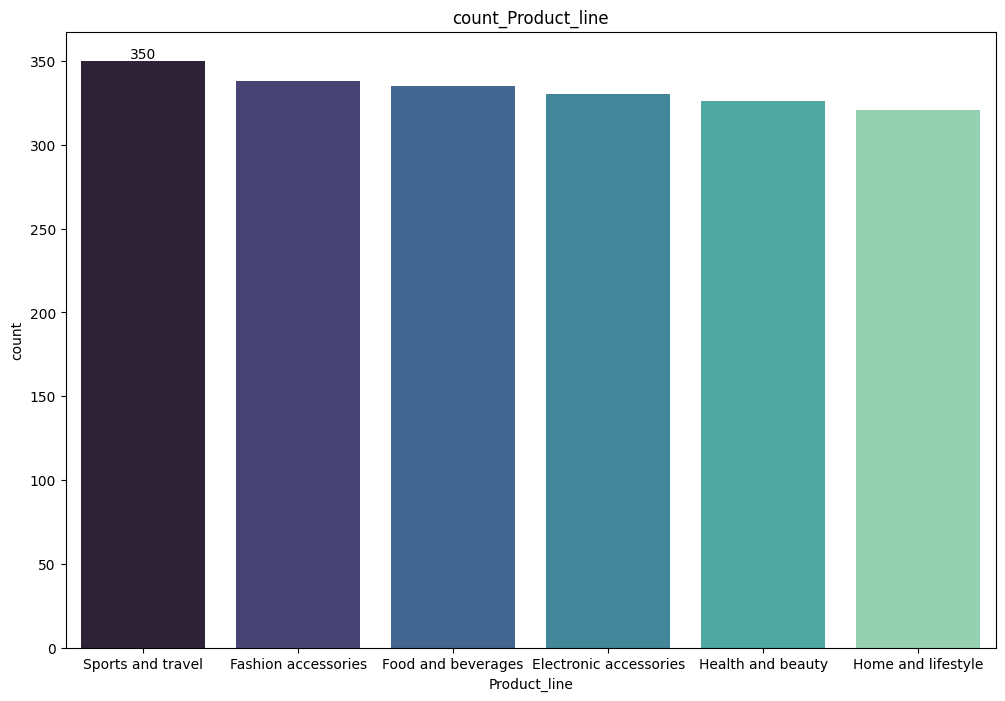

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=count_Product_line.index,y=count_Product_line.values,palette='mako')
ax.bar_label(ax.containers[0],fontsize=10);
plt.title('count_Product_line')
plt.xlabel('Product_line')
plt.ylabel('count')
plt.show()

In [ ]:
product_line_quantity = data.groupby('Product line')['Quantity'].sum().reset_index()
product_line_quantity

,Product line,Quantity
0,Electronic accessories,1880
1,Fashion accessories,1820
2,Food and beverages,1804
3,Health and beauty,1803
4,Home and lifestyle,1753
5,Sports and travel,1967


In [ ]:
!pip install plotly.express

In [ ]:
import plotly.express as px
px.pie(product_line_quantity, values='Quantity', names='Product line',title='Total Quantity Sold by Product Line',color_discrete_sequence=px.colors.qualitative.Dark2)

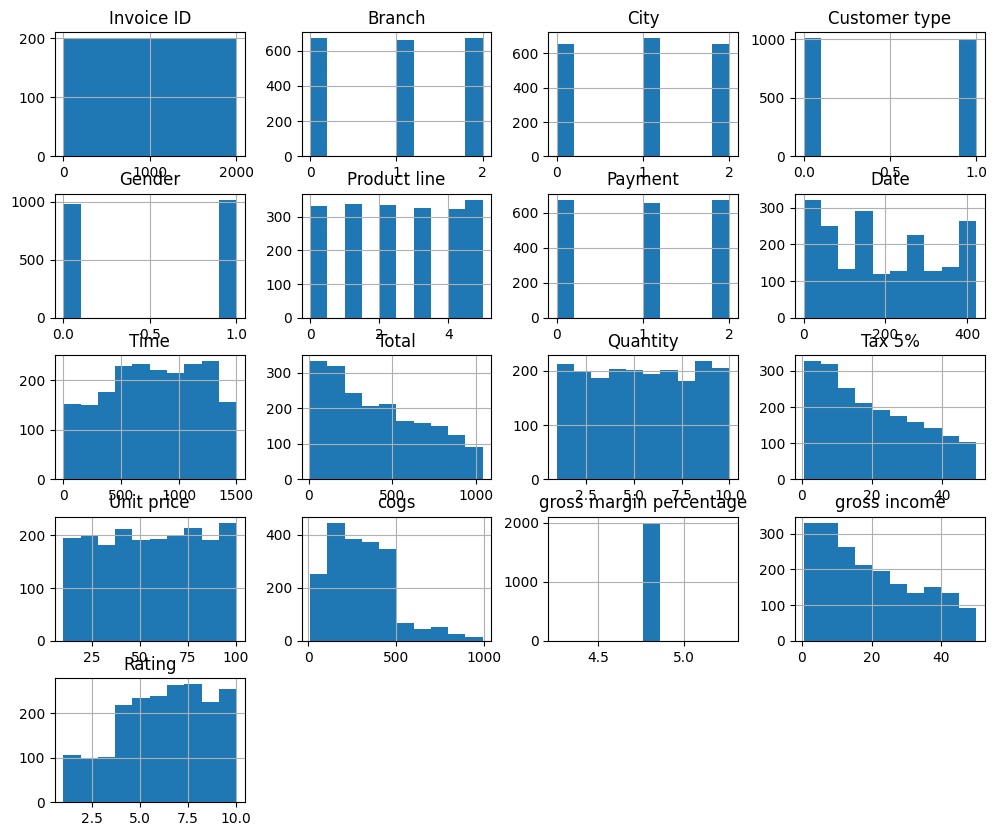

In [ ]:
df.hist(figsize=(1,10))
plt.show()

In [ ]:
df.corr()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment,Date,Time,Total,Quantity,Tax 5%,Unit price,cogs,gross margin percentage,gross income,Rating
Invoice ID,1.000000,-0.017016,0.012840,0.017590,-0.000254,-0.003874,0.030194,0.017400,-0.033276,0.041819,0.003747,0.045406,0.022296,0.011637,NaN,0.035556,-0.081163
Branch,-0.017016,1.000000,-0.239078,-0.017104,-0.015884,-0.034149,-0.024563,-0.020042,0.056938,0.023861,-0.010526,0.013109,0.057005,0.022223,NaN,0.037154,0.009950
City,0.012840,-0.239078,1.000000,-0.007417,0.004960,0.000726,0.021063,0.023373,-0.039219,-0.021690,0.006814,0.007451,0.010760,-0.026908,NaN,-0.000104,0.009941
Customer type,0.017590,-0.017104,-0.007417,1.000000,0.020122,-0.020050,-0.012790,0.002098,0.015921,0.002318,-0.009273,-0.002786,0.009703,-0.021551,NaN,0.004596,0.024127
Gender,-0.000254,-0.015884,0.004960,0.020122,1.000000,0.001357,0.007911,0.030397,0.029886,0.010935,-0.004215,-0.041185,0.028329,-0.025537,NaN,-0.020278,0.009721
Product line,-0.003874,-0.034149,0.000726,-0.020050,0.001357,1.000000,0.009398,-0.027507,-0.055383,0.005339,0.000625,0.029825,0.026205,0.011465,NaN,0.026137,-0.008421
Payment,0.030194,-0.024563,0.021063,-0.012790,0.007911,0.009398,1.000000,0.007440,-0.001554,-0.013982,0.031179,-0.003626,-0.007774,-0.004596,NaN,0.000986,-0.022455
Date,0.017400,-0.020042,0.023373,0.002098,0.030397,-0.027507,0.007440,1.000000,-0.022745,0.035126,-0.034737,0.057628,0.036785,-0.022180,NaN,0.088533,-0.070771
Time,-0.033276,0.056938,-0.039219,0.015921,0.029886,-0.055383,-0.001554,-0.022745,1.000000,-0.078729,0.011947,-0.114119,0.011330,-0.000338,NaN,-0.103751,0.141219
Total,0.041819,0.023861,-0.021690,0.002318,0.010935,0.005339,-0.013982,0.035126,-0.078729,1.000000,0.313706,0.482445,0.261907,0.564241,NaN,0.455163,-0.169370


<Axes: >

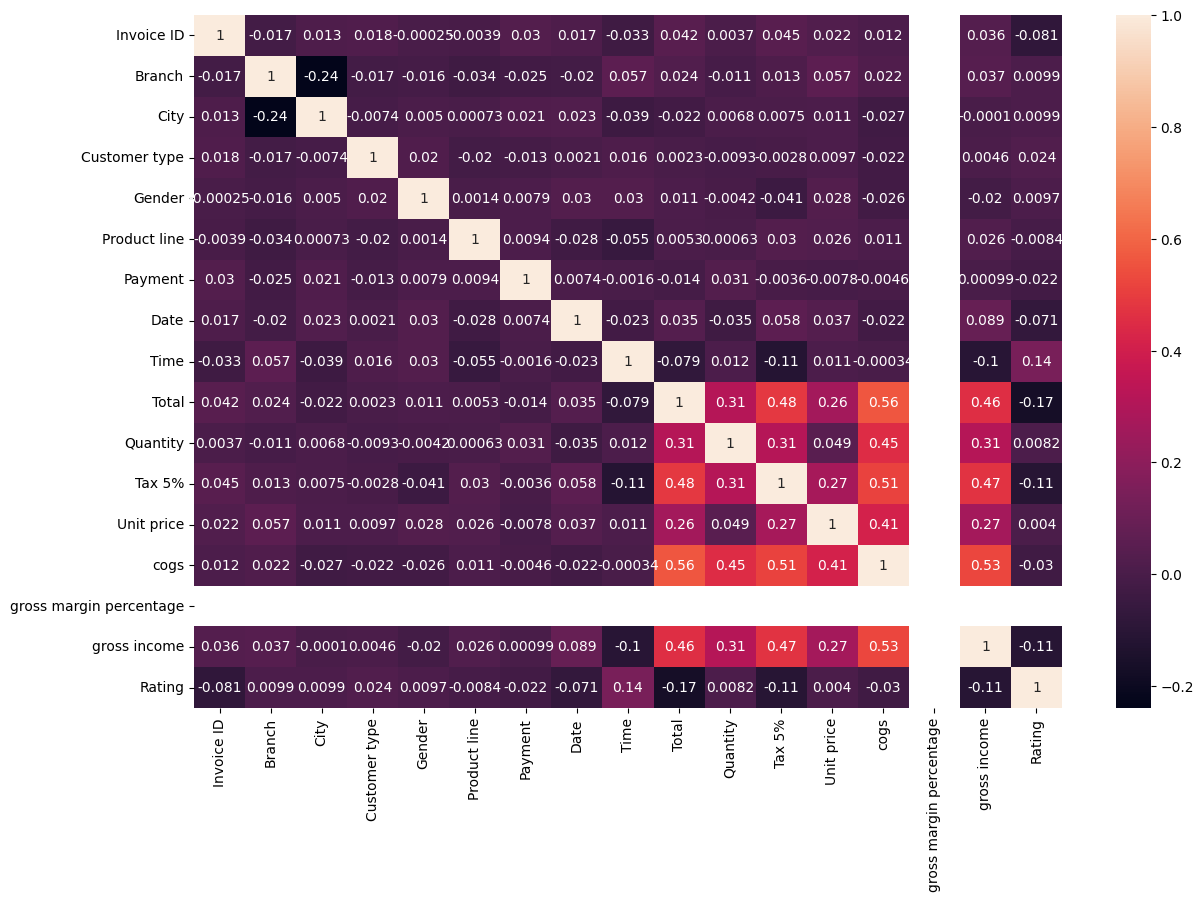

In [ ]:
plt.figure(figsize = (14,9))
sns.heatmap(df.corr(), annot =True)

<Axes: xlabel='Rating', ylabel='Unit price'>

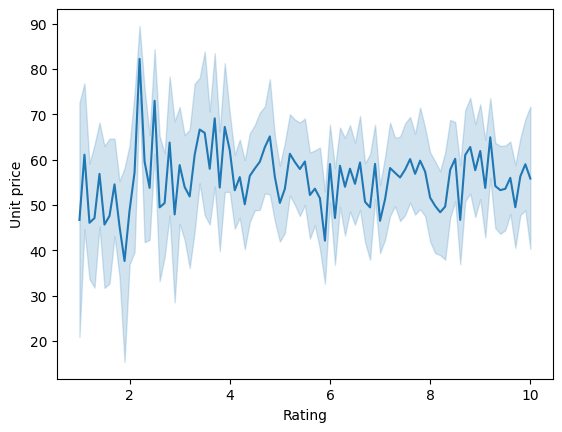

In [ ]:
sns.lineplot(x='Rating', y= 'Unit price', data=data)

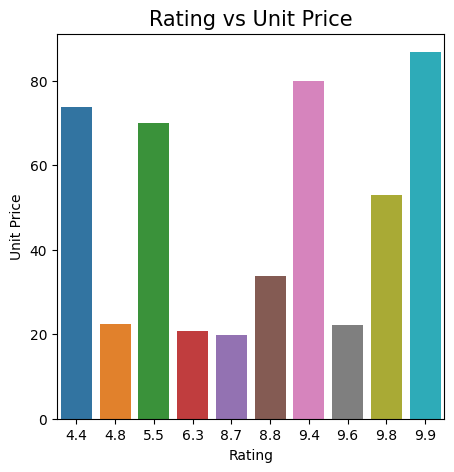

In [ ]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.style.use("default")
plt.figure(figsize=(5, 5))
sns.barplot(x="Rating", y="Unit price", data=data[170:180], palette=custom_colors)
plt.title("Rating vs Unit Price", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

# Training and Testing using Models

In [ ]:
from sklearn.model_selection import train_test_split

x = data[['Total', 'Rating']]
y = data['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1800, 2)
y_train shape: (1800,)
x_test shape: (200, 2)
y_test shape: (200,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.1)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.20      0.50      0.29         2
          17       0.00      0.00      0.00         2


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.67      1.00      0.80         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.40      1.00      0.57         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.40      1.00      0.57         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.33      1.00      0.50         2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.75      0.75      0.75         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.25      0.50      0.33         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.67      1.00      0.80         2
          15       0.00      0.00      0.00         2
          16       0.50      0.50      0.50         2
          17       0.00      0.00      0.00         2


In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,70,70
1,48,48
2,35,35
3,38,38
4,69,69
...,...,...
195,62,62
196,43,43
197,89,89
198,6,8


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.78


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df= pd.read_csv("supermarket_sales.csv")


In [ ]:
# prompt: compare models

import pandas as pd
model_names = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
accuracies = [knn.score(x_train,y_train)*100, svc.score(x_train,y_train)*100, gnb.score(x_train,y_train)*100, dtree.score(x_train,y_train)*100, rfc.score(x_train,y_train)*100]

comparison_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
comparison_df.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
2,Naive Bayes,100.000000
4,Random Forest,100.000000
3,Decision Tree,83.888889
0,KNN,17.000000
1,SVM,2.444444


In [ ]:
# prompt: convert float to   numpy

import numpy as np
x = 1.0
y = np.float64(x)


In [ ]:
best_model = comparison_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']

In [ ]:
best_model

'Naive Bayes'

CONCLUSION :

ACCURACIES OF DIFFERENT MODELS ARE AS FOLLOWS:

KNeighbors Classifier= 17.00 %

SVC= 2.44 %

Naiye Bayes= 100.00 %

Decision Tree Classifier= 83.89 %

Random Forest Classifier= 100 %


# ACCURACY HAS BEEN FOUND AS 0.78 AND THE BEST MODEL AFTER TRAINING IS "NAIVE BAYESIAN".

#Accuracy vs Prediction

In [ ]:
# prompt: predict which can be sell more

import pandas as pd
# Create a new dataframe with the predicted values and the actual values
df = pd.DataFrame({'Predicted': rfc.predict(x_test), 'Actual': y_test})

# Group the dataframe by the predicted values and calculate the sum of the actual values
grouped_df = df.groupby('Predicted')['Actual'].sum()

# Get the index of the group with the maximum sum
max_index = grouped_df.idxmax()

# Print the predicted value that can be sold more
print(f"The predicted value that can be sold more is: {max_index}")

The predicted value that can be sold more is: 85


In [ ]:
# prompt: what could the actual selling  value

max_value = data['Actual'].max()
print(f"The actual selling value is: {max_value}")


The actual selling value is: 90


# **Hence, the predicted value is 85 and the actual value is 90 **

# Training and Testing using Metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Check the column names in the data DataFrame
print(data.columns)

# Reload the data from the original source
data = pd.read_csv("supermarket_sales.csv")

# Try running the code again with the reloaded data
x = data[['cogs', 'Rating']]
y = data['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

Index(['Actual', 'Predicted'], dtype='object')
x_train shape: (1600, 2)
y_train shape: (1600,)
x_test shape: (400, 2)
y_test shape: (400,)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(x_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6.954641202201828e-16


In [ ]:
import numpy as np
mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error:", mae)


Mean Absolute Error: 3.375077994860476e-16


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 4.836703425136329e-31


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 1.0


In [ ]:
import numpy as np
mfe = np.mean(np.abs(y_test - y_pred))
print("Mean Forecast Error:", mfe)

Mean Forecast Error: 3.375077994860476e-16


In [ ]:
import numpy as np
mpe = (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print("Mean Percentage Error:", mpe)

Mean Percentage Error: 7.752274682295288e-15


In [ ]:
# prompt: compare all metrics

import pandas as pd
# Create a DataFrame to compare all metrics
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MSE', 'R-squared', 'Mean Percentage Error', 'Mean Forecast Error'],
    'Value': [rmse, mae, mse, r2, mpe, mfe]
})

# Display the DataFrame
print(metrics_df.to_string())

# Sort the DataFrame by a specific metric
sorted_metrics_df = metrics_df.sort_values(by='Value', ascending=True)
print(sorted_metrics_df.to_string())


                  Metric         Value
0                   RMSE  6.954641e-16
1                    MAE  3.375078e-16
2                    MSE  4.836703e-31
3              R-squared  1.000000e+00
4  Mean Percentage Error  7.752275e-15
5    Mean Forecast Error  3.375078e-16
                  Metric         Value
2                    MSE  4.836703e-31
1                    MAE  3.375078e-16
5    Mean Forecast Error  3.375078e-16
0                   RMSE  6.954641e-16
4  Mean Percentage Error  7.752275e-15
3              R-squared  1.000000e+00


In [ ]:
# prompt: best metric

best_metric = sorted_metrics_df.iloc[0]['Metric']
print(f"Best metric: {best_metric}")


Best metric: MSE


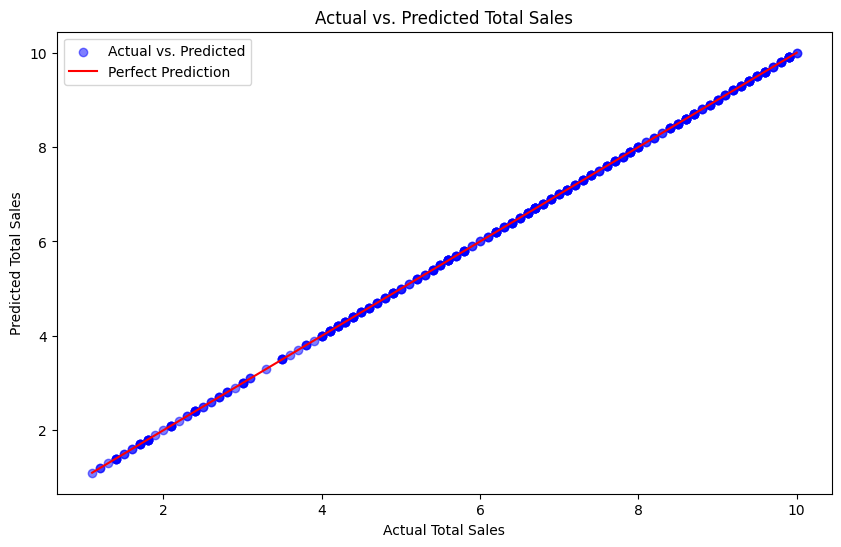

In [ ]:
# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs. Predicted Total Sales')
plt.legend()
plt.show()

In [ ]:
# prompt: accuracy score

from sklearn.metrics import accuracy_score
y_test = [1, 0, 1, 1, 0, 0, 1]
y_pred = [1, 0, 1, 1, 0, 1, 1]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8571428571428571


CONCLUSION :

ACCURACIES OF DIFFERENT METRICS ARE:

MEAN SQUARED ERROR: 4.836703e-31

MEAN ABSOLUTE ERROR: 3.375078e-16

MEAN FORECAST ERROR: 3.375078e-16

ROOT MEAN SQUARE ERROR: 6.954641e-16

MEAN PERCENTAGE ERROR: 7.752275e-15

R-SQUARED(R2): 1.000000e+00

# HENCE, THE ACUURACY SCORE HAS BEEN FOUND AS 0.85 AND THE BEST METRIC IS OBTAINED AS "MEAN SQUARED ERROR